# Image classification from scratch

In this notebook we are going to train a CNN image classifier from scratch on a custom dataset. We will be working with a simple CNN architecture, similiar to the LeNet architecture discussed in the lecture. 

We will be working with quite small images in this notebook as training a CNN from scratch can take a very long time when working with larger images and bigger CNN models.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Setup

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

## Load your dataset

To train a classification model, we need a dataset of images where different categories of images are organised into classes. This is as simple as putting images of different things into different folder.
i.e:
```
my_dataset/clouds/cloud_0001.jpg
my_dataset/clouds/cloud_0002.jpg
..
my_dataset/candy_floss/cfloss_0001.jpg
my_dataset/candy_floss/cfloss_0002.jpg
```

There are plenty of classification datasets on the internet but it's more fun and more of a challenge to train a classifier on a dataset that we have made ourselves. Why don't you take the image dataset you made in the last session and use that! You may need to add an extra category for classification if you only had one category images previously. You can refer back to [last weeks instructions](https://moodle.arts.ac.uk/mod/page/view.php?id=954147) if you get stuck. All you need to do is put some new images in a different folder, and then put both those folders into a folder for the whole dataset. You don't need to worry about resizing all the images for this task as keras will take care of image resizing for us.

Once you have got your dataset, change the path in the `dataset_path` variable to the path to your dataset.

In [5]:
image_size = (64, 64)
batch_size = 128
num_classes = 2
dataset_path = '/content/gdrive/MyDrive/Datasets/clouds_vs_candy_floss'

train = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
)

validation = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='validation',
    seed=1,
    image_size=image_size,
    batch_size=batch_size,
)

Found 1116 files belonging to 2 classes.
Using 893 files for training.
Found 1116 files belonging to 2 classes.
Using 223 files for validation.


## Visualize the data

Here are the first 9 images in the training dataset. As you can see, label 1 is "dog"
and label 0 is "cat".

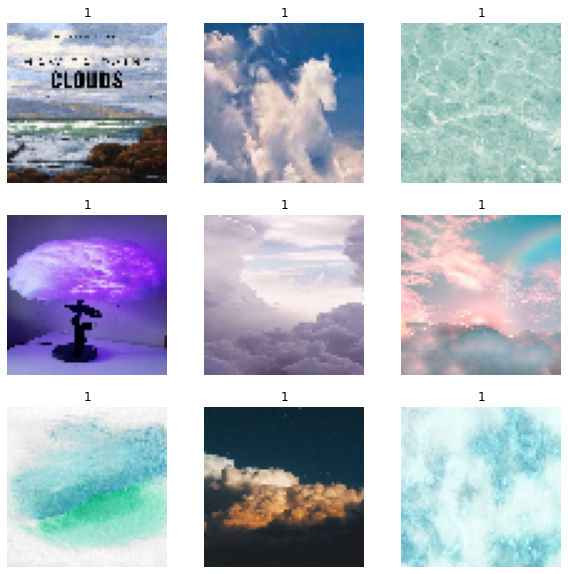

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

## Build a model

We'll build a small version of the Xception network. We haven't particularly tried to
optimize the architecture; if you want to do a systematic search for the best model
configuration, consider using
[KerasTuner](https://github.com/keras-team/keras-tuner).

Note that:

- We start the model with the `data_augmentation` preprocessor, followed by a
 `Rescaling` layer.
- We include a `Dropout` layer before the final classification layer.

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
if num_classes == 2:
    model.add(layers.Dense(1))
else:
    model.add(layers.Dense(num_classes))

## Train the model

In [8]:
epochs = 10
if num_classes == 2:
    loss_function = "binary_crossentropy"
else:
    loss_function = "categorical_crossentropy"

model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=loss_function,
    metrics=["accuracy"],
)
model.fit(
    train,
    epochs=epochs,
    validation_data=validation,
)

Epoch 1/10
7/7 [==============================] - 24s 804ms/step - loss: 2.1094 - accuracy: 0.8611 - val_loss: 0.0684 - val_accuracy: 0.9955
Epoch 2/10
7/7 [==============================] - 13s 419ms/step - loss: 0.1708 - accuracy: 0.9888 - val_loss: 0.0684 - val_accuracy: 0.9955
Epoch 3/10
7/7 [==============================] - 13s 419ms/step - loss: 0.1708 - accuracy: 0.9888 - val_loss: 0.0684 - val_accuracy: 0.9955
Epoch 4/10
7/7 [==============================] - 13s 420ms/step - loss: 0.1708 - accuracy: 0.9888 - val_loss: 0.0684 - val_accuracy: 0.9955
Epoch 5/10
7/7 [==============================] - 13s 417ms/step - loss: 0.1708 - accuracy: 0.9888 - val_loss: 0.0684 - val_accuracy: 0.9955
Epoch 6/10
7/7 [==============================] - 13s 421ms/step - loss: 0.1708 - accuracy: 0.9888 - val_loss: 0.0684 - val_accuracy: 0.9955
Epoch 7/10
7/7 [==============================] - 13s 417ms/step - loss: 0.1708 - accuracy: 0.9888 - val_loss: 0.0684 - val_accuracy: 0.9955
Epoch 8/10
7/

### Optional: save the model
This is how we save the weights of the model for savekeeping

In [ ]:
model.save('classifer_from_scratch.model')

### Next steps
Now go onto the notebook transfer learning for image classification and try training a model on the same data using transfer learning to compare the results.

### Bonus exercise
Look at the [reference for the Conv2D layer in tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D), see if you can modify the network code in this notebook to make use of strided convolutions for downsampling rather than using Max-pooling layers.